In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import spotify_api_utils as sp
import numpy as np


In [3]:
token = sp.get_token()

## 1. Correlation between Track Number and Popularity

**Description:**  
This analysis investigates whether a song’s position in an album (its track number) has any influence on its Spotify popularity score. By collecting every track from each album released by the target artist since their debut, extracting each track’s `track_number` and `popularity` metrics, and aggregating the data, we can visualize and quantify any systematic trend—e.g., whether lead‑off tracks consistently outperform later cuts.

**Approach:**  
1. Fetch all albums for the artist and filter to full “album” types released from 2006 onward.  
2. Compile every track’s metadata, merge in the Spotify‑reported popularity value, and group by `track_number`.  
3. Plot average popularity vs. track position (scatter + trend line) and complement with a box plot to highlight variability.

**Significance:**  
Understanding this relationship can inform release strategies—if earlier tracks consistently see higher engagement, artists and labels might prioritize lead singles or sequence tracklists to maximize listener retention.  


In [82]:
artist_id = sp.search_for_artist(token, 'Drake')['id']
albums = sp.search_for_album(token, 'Drake')
albums_df = pd.DataFrame(albums)
albums_df_cleaned = albums_df[(albums_df['album_type'] == 'album') & (albums_df['release_date'] >= "2006-01-01")].copy()
artist_filter = albums_df_cleaned['artists'].apply(lambda artists: any(a['id']==artist_id for a in artists))
artist_albums = albums_df_cleaned[artist_filter]
artist_albums

,album_type,total_tracks,available_markets,external_urls,href,id,images,name,release_date,release_date_precision,type,uri,artists
0,album,19,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",{'spotify': 'https://open.spotify.com/album/6X...,https://api.spotify.com/v1/albums/6X1x82kppWZm...,6X1x82kppWZmDzlXXK3y3q,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Take Care (Deluxe),2011-11-15,day,album,spotify:album:6X1x82kppWZmDzlXXK3y3q,[{'external_urls': {'spotify': 'https://open.s...
1,album,18,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",{'spotify': 'https://open.spotify.com/album/1L...,https://api.spotify.com/v1/albums/1LShhEEKRT5M...,1LShhEEKRT5MNPcO7jtYHh,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",So Far Gone,2009,year,album,spotify:album:1LShhEEKRT5MNPcO7jtYHh,[{'external_urls': {'spotify': 'https://open.s...
2,album,20,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",{'spotify': 'https://open.spotify.com/album/40...,https://api.spotify.com/v1/albums/40GMAhriYJRO...,40GMAhriYJRO1rsY4YdrZb,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Views,2016-05-06,day,album,spotify:album:40GMAhriYJRO1rsY4YdrZb,[{'external_urls': {'spotify': 'https://open.s...
3,album,13,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",{'spotify': 'https://open.spotify.com/album/1X...,https://api.spotify.com/v1/albums/1XslIirSxfAh...,1XslIirSxfAhhxRdn4Li9t,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Nothing Was The Same,2013-01-01,day,album,spotify:album:1XslIirSxfAhhxRdn4Li9t,[{'external_urls': {'spotify': 'https://open.s...
4,album,17,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",{'spotify': 'https://open.spotify.com/album/7d...,https://api.spotify.com/v1/albums/7dqpveMVcWgb...,7dqpveMVcWgbzqYrOdkFTD,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Care Package,2019-08-02,day,album,spotify:album:7dqpveMVcWgbzqYrOdkFTD,[{'external_urls': {'spotify': 'https://open.s...
5,album,17,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",{'spotify': 'https://open.spotify.com/album/0p...,https://api.spotify.com/v1/albums/0ptlfJfwGTy0...,0ptlfJfwGTy0Yvrk14JK1I,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",If You're Reading This It's Too Late,2015-02-12,day,album,spotify:album:0ptlfJfwGTy0Yvrk14JK1I,[{'external_urls': {'spotify': 'https://open.s...
7,album,11,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",{'spotify': 'https://open.spotify.com/album/1o...,https://api.spotify.com/v1/albums/1ozpmkWcCHws...,1ozpmkWcCHwsQ4QTnxOOdT,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",What A Time To Be Alive,2015-09-20,day,album,spotify:album:1ozpmkWcCHwsQ4QTnxOOdT,[{'external_urls': {'spotify': 'https://open.s...
12,album,19,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",{'spotify': 'https://open.spotify.com/album/4e...,https://api.spotify.com/v1/albums/4epK17BZv559...,4epK17BZv559EXBACsQXQG,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Take Care (Deluxe),2011-11-15,day,album,spotify:album:4epK17BZv559EXBACsQXQG,[{'external_urls': {'spotify': 'https://open.s...
14,album,25,"[AE, AU, BB, BF, BH, BN, BY, CA, DZ, EG, GB, G...",{'spotify': 'https://open.spotify.com/album/42...,https://api.spotify.com/v1/albums/42wvKYHFezpm...,42wvKYHFezpmDuAP43558f,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Scorpion,2018-06-29,day,album,spotify:album:42wvKYHFezpmDuAP43558f,[{'external_urls': {'spotify': 'https://open.s...
18,album,21,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",{'spotify': 'https://open.spotify.com/album/6s...,https://api.spotify.com/v1/albums/6sp02aeyiwfX...,6sp02aeyiwfX35xRqwNiPv,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Certified Lover Boy,2021-09-02,day,album,spotify:album:6sp02aeyiwfX35xRqwNiPv,[{'external_urls': {'spotify': 'https://open.s...


In [128]:
total_album_list = artist_albums['id'].to_list()
total_songs_list = []
for idx, album_id in enumerate(total_album_list):
    tracks = sp.get_tracks_from_albums(token,album_id)
    total_songs_list.extend(tracks)
song_id_list = []
df_total_song = pd.DataFrame(total_songs_list).copy()
song_id_list = df_total_song['id'].to_list()
song_id_list

['2Gnsof1hvZzjE1xdLRpjtf',
 '6Z01gUquJsjJC67uNWm6P0',
 '6LxSe8YmdPxy095Ux6znaQ',
 '0V4l4GQhgnWQGtCWpvA7va',
 '124NFj84ppZ5pAxTuVQYCQ',
 '047fCsbO4NdmwCBn8pcUXl',
 '1ZyudLFv35SRvY5SvTZqJx',
 '1D9XLqQp2YYiOxrr5KLb8K',
 '7udsBKuqnJ5csWTAkR0vEI',
 '7yfg0Eer6UZZt5tZ1XdsWz',
 '1QBwk6GTCxVdC2hoSw9tlM',
 '2FbGlEPAjNhWvrVvlentVq',
 '4eSGSqP2TZvvX0kadZZttM',
 '74atKkOasLOVzvqB6mYgga',
 '7t1lBIr3WIEtqQEOdZFMUf',
 '0m1KYWlT6LhFRBDVq9UNx4',
 '0jF2AdhsalO1L7KkhK4LE5',
 '4xRxYWgAtL6pzRz94GlZlA',
 '4Kz4RdRCceaA9VgTqBhBfa',
 '1v24T2ug4TlssYZvI3aL4O',
 '3XLSlQLJf3Ut0zvMUxnF1h',
 '6NwhtCYkfwWlcR62Ac4E7y',
 '4FDSPGncHRpr6yB8DD4CtI',
 '0JaVdpmiex2EP7bBzyKVTa',
 '2hcohLIysMxofYziluXCoX',
 '3lkkkYc1wBj5l3FVlpqvP6',
 '7mPoCVGP752A5DtHf1SKkM',
 '524wvipGqxPKYWxkjf9y46',
 '3QLjDkgLh9AOEHlhQtDuhs',
 '2TWSilrWcTrgVKcP8kfEfg',
 '0q7LGcVSpsIoSbjChtZ8lI',
 '43iKgGbmfqPLh3mxUlospI',
 '4i3GraNMzBKze1WsVl38DS',
 '6MlGqWzDiLkZ0vmAEsisEk',
 '6hHKFReuQR9VQp39ev43wY',
 '4XTXamS1g4g93jPxyuFJJ6',
 '3SnXwQUrvSacFziUYXTNKY',
 

In [132]:
total_track_list = []
for track in song_id_list:
    tracks = sp.get_tracks_using_id(token, track)
    total_track_list.append(tracks)
df_total_track_list = pd.DataFrame(total_track_list)
df_total_track_list

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,272573,True,{'isrc': 'USCM51100544'},{'spotify': 'https://open.spotify.com/track/2G...,https://api.spotify.com/v1/tracks/2Gnsof1hvZzj...,2Gnsof1hvZzjE1xdLRpjtf,False,Over My Dead Body,74,None,1,track,spotify:track:2Gnsof1hvZzjE1xdLRpjtf
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,224720,True,{'isrc': 'USCM51100545'},{'spotify': 'https://open.spotify.com/track/6Z...,https://api.spotify.com/v1/tracks/6Z01gUquJsjJ...,6Z01gUquJsjJC67uNWm6P0,False,Shot For Me,73,None,2,track,spotify:track:6Z01gUquJsjJC67uNWm6P0
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,235986,True,{'isrc': 'USCM51100290'},{'spotify': 'https://open.spotify.com/track/6L...,https://api.spotify.com/v1/tracks/6LxSe8YmdPxy...,6LxSe8YmdPxy095Ux6znaQ,False,Headlines,84,None,3,track,spotify:track:6LxSe8YmdPxy095Ux6znaQ
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,208813,True,{'isrc': 'USCM51100546'},{'spotify': 'https://open.spotify.com/track/0V...,https://api.spotify.com/v1/tracks/0V4l4GQhgnWQ...,0V4l4GQhgnWQGtCWpvA7va,False,Crew Love,73,None,4,track,spotify:track:0V4l4GQhgnWQGtCWpvA7va
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,277386,True,{'isrc': 'USCM51100547'},{'spotify': 'https://open.spotify.com/track/12...,https://api.spotify.com/v1/tracks/124NFj84ppZ5...,124NFj84ppZ5pAxTuVQYCQ,False,Take Care,78,None,5,track,spotify:track:124NFj84ppZ5pAxTuVQYCQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,149077,False,{'isrc': 'USUG12001745'},{'spotify': 'https://open.spotify.com/track/3h...,https://api.spotify.com/v1/tracks/3h4DgeqD7d2P...,3h4DgeqD7d2Pu8QF0j7NEH,False,Pain 1993 (with Playboi Carti),45,None,10,track,spotify:track:3h4DgeqD7d2Pu8QF0j7NEH
184,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,271183,False,{'isrc': 'USUG12001737'},{'spotify': 'https://open.spotify.com/track/0z...,https://api.spotify.com/v1/tracks/0zpcGwpkk1Vn...,0zpcGwpkk1Vn2wvZP9XCF9,False,Losses,29,None,11,track,spotify:track:0zpcGwpkk1Vn2wvZP9XCF9
185,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,234782,False,{'isrc': 'USUG12001739'},{'spotify': 'https://open.spotify.com/track/7F...,https://api.spotify.com/v1/tracks/7FlgWcLOubhQ...,7FlgWcLOubhQXsSUChLMPL,False,From Florida With Love,30,None,12,track,spotify:track:7FlgWcLOubhQXsSUChLMPL
186,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,204805,False,{'isrc': 'USUG12001741'},{'spotify': 'https://open.spotify.com/track/2F...,https://api.spotify.com/v1/tracks/2FVsrYXCOdTV...,2FVsrYXCOdTVn7MTj0yupd,False,Demons (feat. Fivio Foreign & Sosa Geek),30,None,13,track,spotify:track:2FVsrYXCOdTVn7MTj0yupd


In [139]:
df_total_track_cleaned = df_total_track_list[['name', 'track_number', 'popularity', 'duration_ms', 'explicit', 'available_markets']].copy()
df_total_track_cleaned

,name,track_number,popularity,duration_ms,explicit,available_markets
0,Over My Dead Body,1,74,272573,True,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
1,Shot For Me,2,73,224720,True,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
2,Headlines,3,84,235986,True,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
3,Crew Love,4,73,208813,True,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
4,Take Care,5,78,277386,True,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
...,...,...,...,...,...,...
183,Pain 1993 (with Playboi Carti),10,45,149077,False,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
184,Losses,11,29,271183,False,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
185,From Florida With Love,12,30,234782,False,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
186,Demons (feat. Fivio Foreign & Sosa Geek),13,30,204805,False,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."


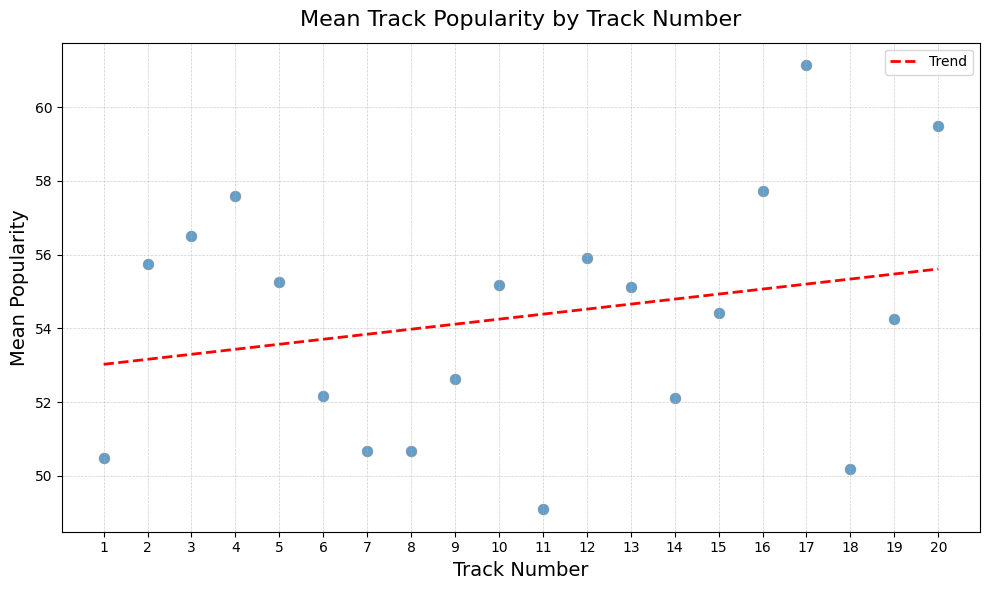

In [164]:
track_popularity = df_total_track_cleaned.groupby('track_number')['popularity'].mean().copy()
track_popularity = track_popularity.reset_index()
x = track_popularity['track_number']
y = track_popularity['popularity']

plt.figure(figsize=(10, 6))
plt.scatter(x, y,
            s=60,
            alpha=0.7,
            edgecolors='gray',
            linewidths=0.5)

# Add a simple trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", linewidth=2, label="Trend")

# Labels and title
plt.title('Mean Track Popularity by Track Number', fontsize=16, pad=12)
plt.xlabel('Track Number', fontsize=14)
plt.ylabel('Mean Popularity', fontsize=14)

# Grid and layout
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.xticks(range(1, x.max()+1))
plt.legend()
plt.tight_layout()
plt.show()
